_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 51,073
Trainable params: 51,073
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 5049 samples
Epoch 1/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.111

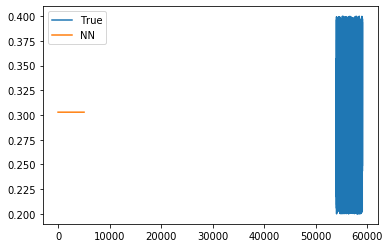

-0.0010564418074630044
0.04908457534331051


In [8]:
import pandas as pd
import numpy as np
from keras.layers import Dense,Dropout,Activation,Input
from keras.models import Sequential,Model
from numpy import *
from keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error

#神经网络模型构建
def make_model(InputSize):
    model=Sequential()
    model.add(Dense(units=128,activation='relu',input_shape=(InputSize,)))
#     model.add(Dropout(0.05))
    model.add(Dense(units=128,activation='relu'))
#     model.add(Dropout(0.05))
    model.add(Dense(units=128,activation='relu'))
#     model.add(Dropout(0.05))
    model.add(Dense(units=128,activation='relu'))
#     model.add(Dropout(0.05))
    model.add(Dense(units=1,activation=None))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=[metrics.mae])
    print(model.summary())
    return model

if __name__ == '__main__':

    #划分训练集和测试集的输入输出 
#     df_train=pd.read_csv('train_data.csv')
#     df_test=pd.read_csv('test_data.csv')
#     X_train = df_train.drop('average',axis=1)
#     X_train = X_train.drop('price',axis=1)
#     y_train = df_train['price']
#     X_test = df_test.drop('average', axis=1)
#     X_test = X_test.drop('price', axis=1)
#     y_test = df_test['price']
    x = pd.read_csv('params.csv')
    x = x.values
    train_X = x[0:54000]
    train_X = pd.DataFrame(train_X)
#     print(len(trainX),trainX)
    test_X = x[54000::]
    test_X = pd.DataFrame(test_X)
#     print(type(testX), len(testX),testX)

    y = pd.read_csv('label.csv', usecols=['SituComp'])
#     print(type(y), y)
    train_Y = y[0:54000]
    test_Y = y[54000::]
#     print(trainY, testY)

    model=make_model(10)

    #训练模型并保存为module.h5
    model.fit(train_X,train_Y,batch_size=32,epochs=10,verbose=1,validation_data=(test_X,test_Y),shuffle=True)
    model.save_weights('module.h5')

    #加载已保存的模型
#     model.load_weights('module.h5',by_name=False)

    #预测并评估结果
    pred=model.predict(test_X)
    plt.plot(test_Y,label='True')
    plt.plot(pred,label='NN')
    plt.legend()
    plt.show() 
    score=r2_score(test_Y,pred)
    error=mean_absolute_error(test_Y,pred)
    print(score)
    print(error)

In [6]:
print(pred[1:100])

[[0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30108285]
 [0.30